In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
re1 = pd.read_csv("bengaluru_house_price.csv")
re1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
re1.shape

(13320, 9)

In [4]:
re1.groupby('area_type')['area_type'].agg('count')  #tell the count of buildings as per type areatype

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
re2 = re1.drop(['area_type','society','balcony','availability'],axis = 'columns') # command to drop the columns names
re2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [6]:
# to tell no of columns which has values of na
re2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# dropna delete/drop the columns which has values of na
re3 = re2.dropna()
re3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
re3.shape

(13246, 5)

In [9]:
# The size property returns the number of elements in the DataFrame. The number of elements is the number of rows * the number of columns.
# Return unique values based on a hash table.
re3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
re3['bhk'] = re3['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\Admin\AppData\Local\Temp\ipykernel_14768\592832168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re3['bhk'] = re3['size'].apply(lambda x:int(x.split(' ')[0]))


In [11]:
re3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [12]:
re3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
re3[re3.bhk>20] #tell the value of bhk which is greater than 20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [14]:
re3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
# function will return no present in total_sqft column is float or not ,if this is float return true,otherwise return false
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
re3[~re3['total_sqft'].apply(is_float)].head(10)  # ~is negate operator

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [17]:
def convert_sq_ft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
         return None

In [18]:
convert_sq_ft_to_num('2166')

2166.0

In [19]:
convert_sq_ft_to_num('3090 - 5002') # giving average of two numbers present in range 

4046.0

In [20]:
convert_sq_ft_to_num('34.46Sq. Meter') #not return any thing

In [21]:
re4 = re3.copy() # it will copy all the data from re3 to re4
re4['total_sqft'] = re4['total_sqft'].apply(convert_sq_ft_to_num) # will retrieve value after applying the above function 
re4.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [22]:
re4.loc[30] # will give details of property of given index value

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
re5 = re4.copy()
re5['Price_per_sqft'] = re5['price'] * 100000 / re5['total_sqft']
re5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   Price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [24]:
# re5.location.unique()
len(re5.location.unique())   # tell the len of location

1304

In [25]:
re5.location = re5['location'].apply(lambda x:x.strip(' ')) # will remove extra space

location_stats = re5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_stats[location_stats<=10])

1052

In [27]:
location_stats_less_than_10= location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [28]:
len(re5.location.unique())

1293

In [29]:
#applying transformation in dataset
re5.location = re5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
# it will combine whole date which is extracted by 'location_stats_less_than_10'in one group named 'other' and except that no changes will be done.
len(re5.location.unique())

242

# Outliers are those data points that are significantly different from the rest of the dataset.
# They are often abnormal observations that skew the data distribution, and arise due to 
# inconsistent data entry, or erroneous observations.
# Reasons for outliers in data
- Errors during data entry or a faulty measuring device (a faulty sensor may result in extreme readings).
- Natural occurrence (salaries of junior level employees vs C-level employees)
# Problems caused by outliers
- Outliers in the data may causes problems during model fitting (esp. linear models).
- Outliers may inflate the error metrics which give higher weights to large errors (example, mean squared error, RMSE).

In [30]:
re5[re5.total_sqft/re5.bhk<300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    Price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [31]:
re5.shape

(13246, 7)

In [32]:
re6 = re5[~(re5.total_sqft/re5.bhk<300)]
re6.shape

(12502, 7)

In [33]:
re6.Price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [34]:
def remove_pps_outliers(re): #taking dataframe 're' as input
    df_out = pd.DataFrame()
    for key, subdf in re.groupby('location'):  #grouping them in 'location'
#per location we get dataframe 'subdf' for which calculating mean(m) and standard deviation (sd) on 'Price_per_sqft' 
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
# filtering the data which is greater than (mean - standard deviation) and lower than (mean + standard deviation) and after filter 
# data will kept in 'reduced_re'
        reduced_re = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
# appending the data in dataframe 'df_out'
        df_out = pd.concat([df_out,reduced_re],ignore_index=True)
    return df_out
re7 = remove_pps_outliers(re6) # remove outliers from re6 
re7.shape

(10241, 7)

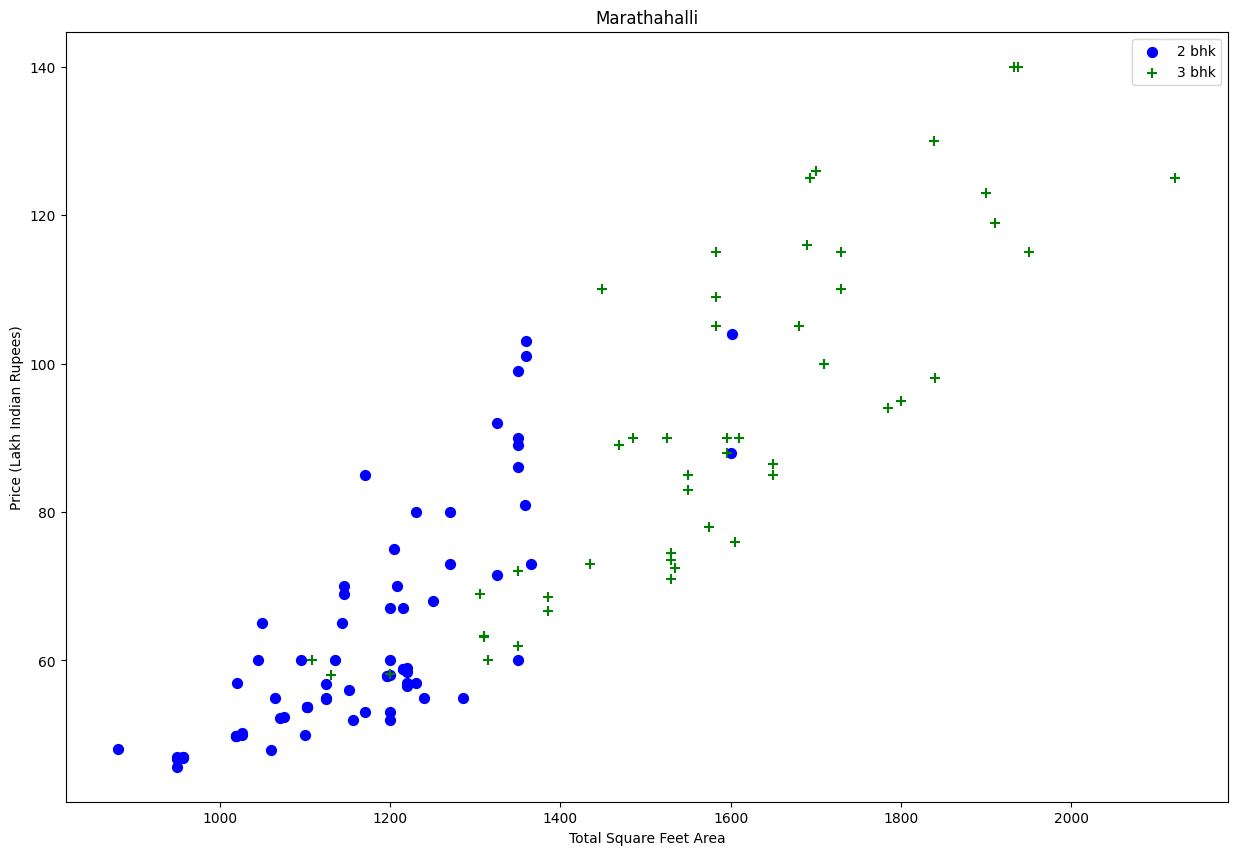

In [35]:
# issue:- in excel, I find that price of some 2 bhk flat is greater than 3 bhk and 2 bhk flat in same location. 
# I left following conditions which increase the price:
# - some luxuries amentites are present in that 2 bhk flat
# - some are in paush area of that location
def plot_scatter_chart(re, location):
    bhk2 = re[(re.location==location) & (re.bhk==2)]
    bhk3 = re[(re.location==location) & (re.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker= '+',color='green',label='3 bhk', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(re7,"Marathahalli")  # chart is generated on basis of location 

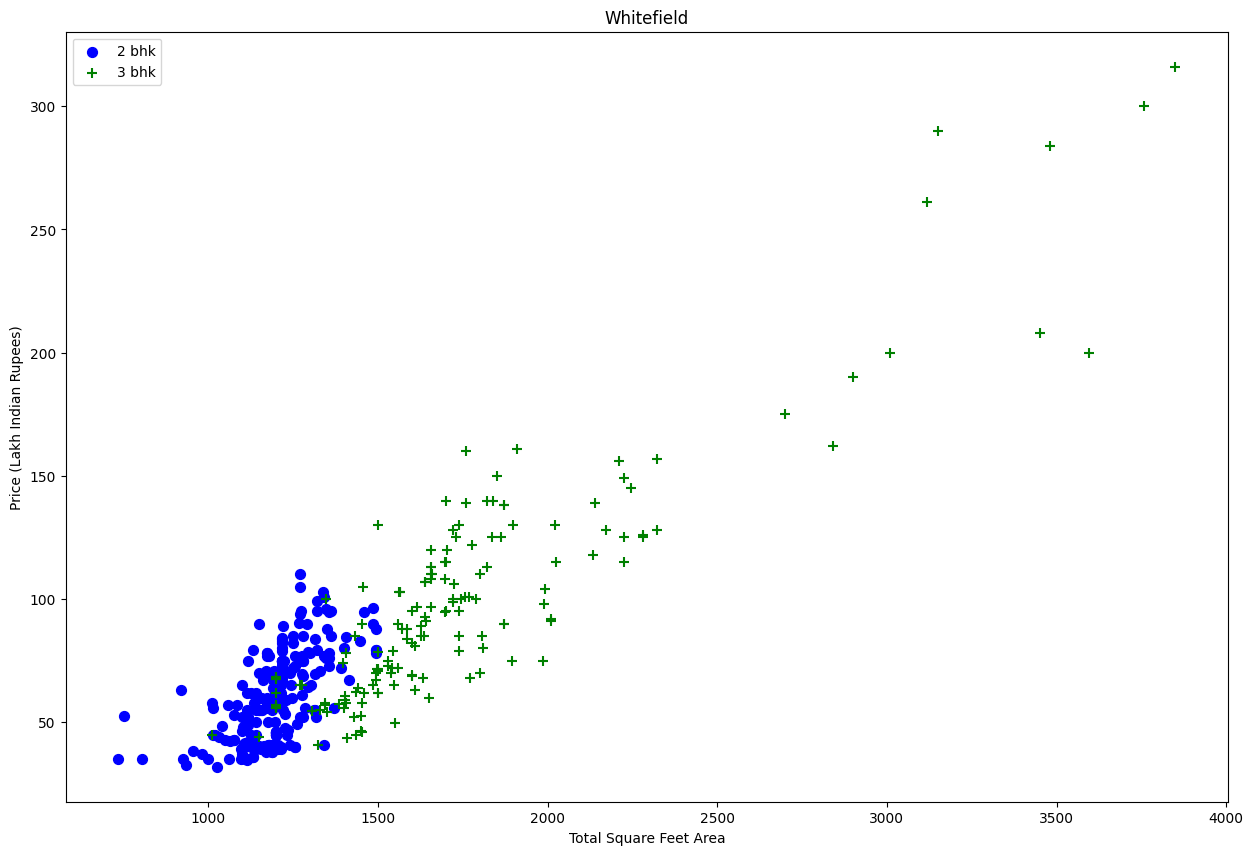

In [36]:
plot_scatter_chart(re7,"Whitefield")  # chart is generated on basis of location 

In [37]:
def remove_bhk_outliers(re):
    remove_indices = np.array([])
    for location, location_re in re.groupby('location'):# group according to 'location' put value in 'location_re'
        bhk_stats = {}
        for bhk, bhk_re in location_re.groupby('bhk'): # group according to 'bhk' put value in 'bhk_re'
            #computing mean,standard deviation, count for each 'bhk'
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_re.Price_per_sqft),
                'std': np.std(bhk_re.Price_per_sqft),
                'count': bhk_re.shape[0]
            }
        for bhk, bhk_re in location_re.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                remove_indices = np.append(remove_indices, bhk_re[bhk_re.Price_per_sqft<(stats['mean'])].index.values)
                # Now remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
    return re.drop(remove_indices,axis='index')
re8 = remove_bhk_outliers(re7)
# df8 = df7.copy()
re8.shape


(7329, 7)

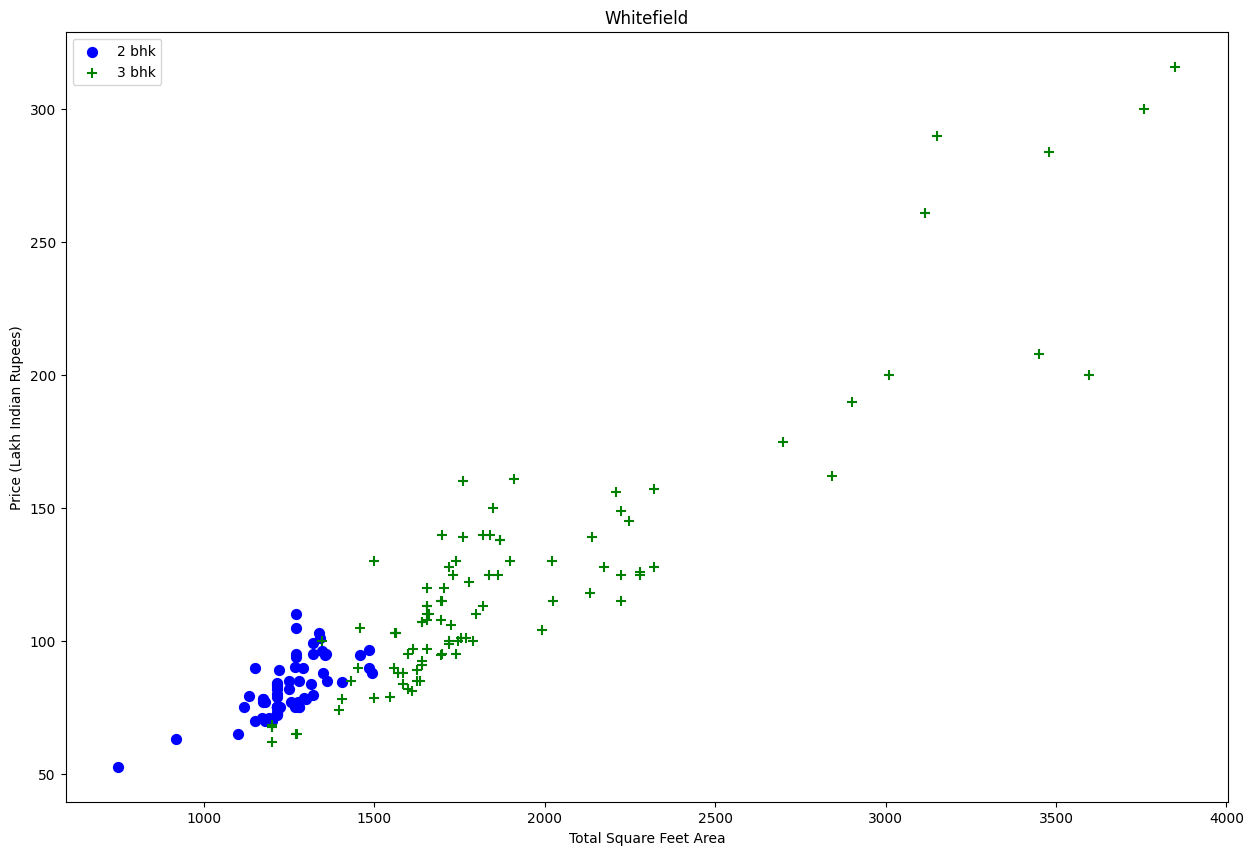

In [38]:
plot_scatter_chart(re8,"Whitefield")  # chart is generated on basis of location 

Text(0, 0.5, 'Count')

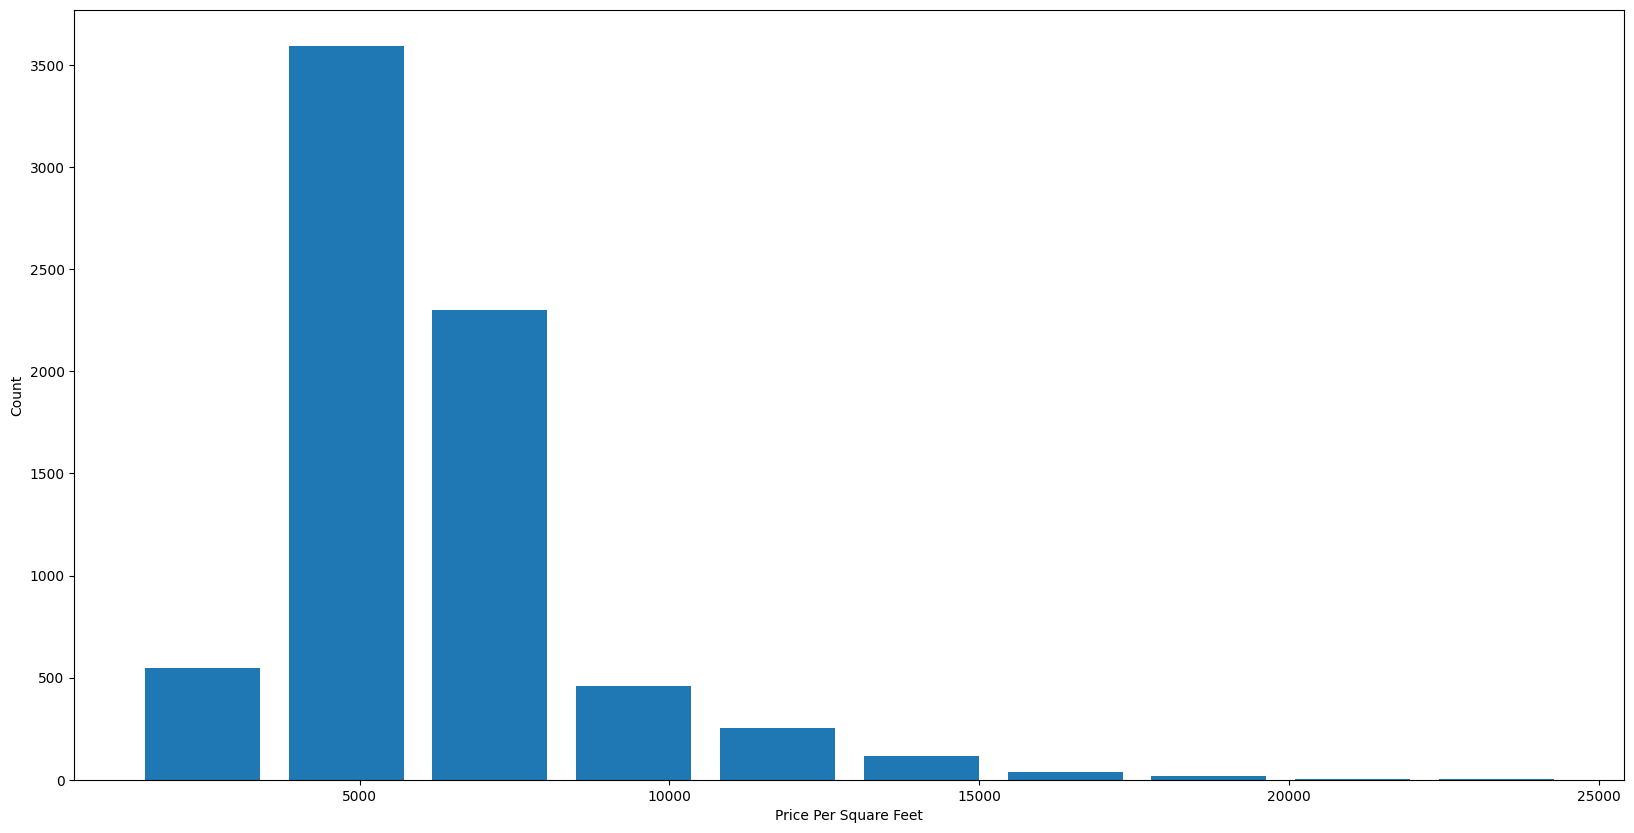

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(re8.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [40]:
re8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [41]:
re8[re8.bath>10]

location    size  total_sqft  bath  price  bhk  Price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8486           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8575           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9308           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9639           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

Text(0, 0.5, 'Count')

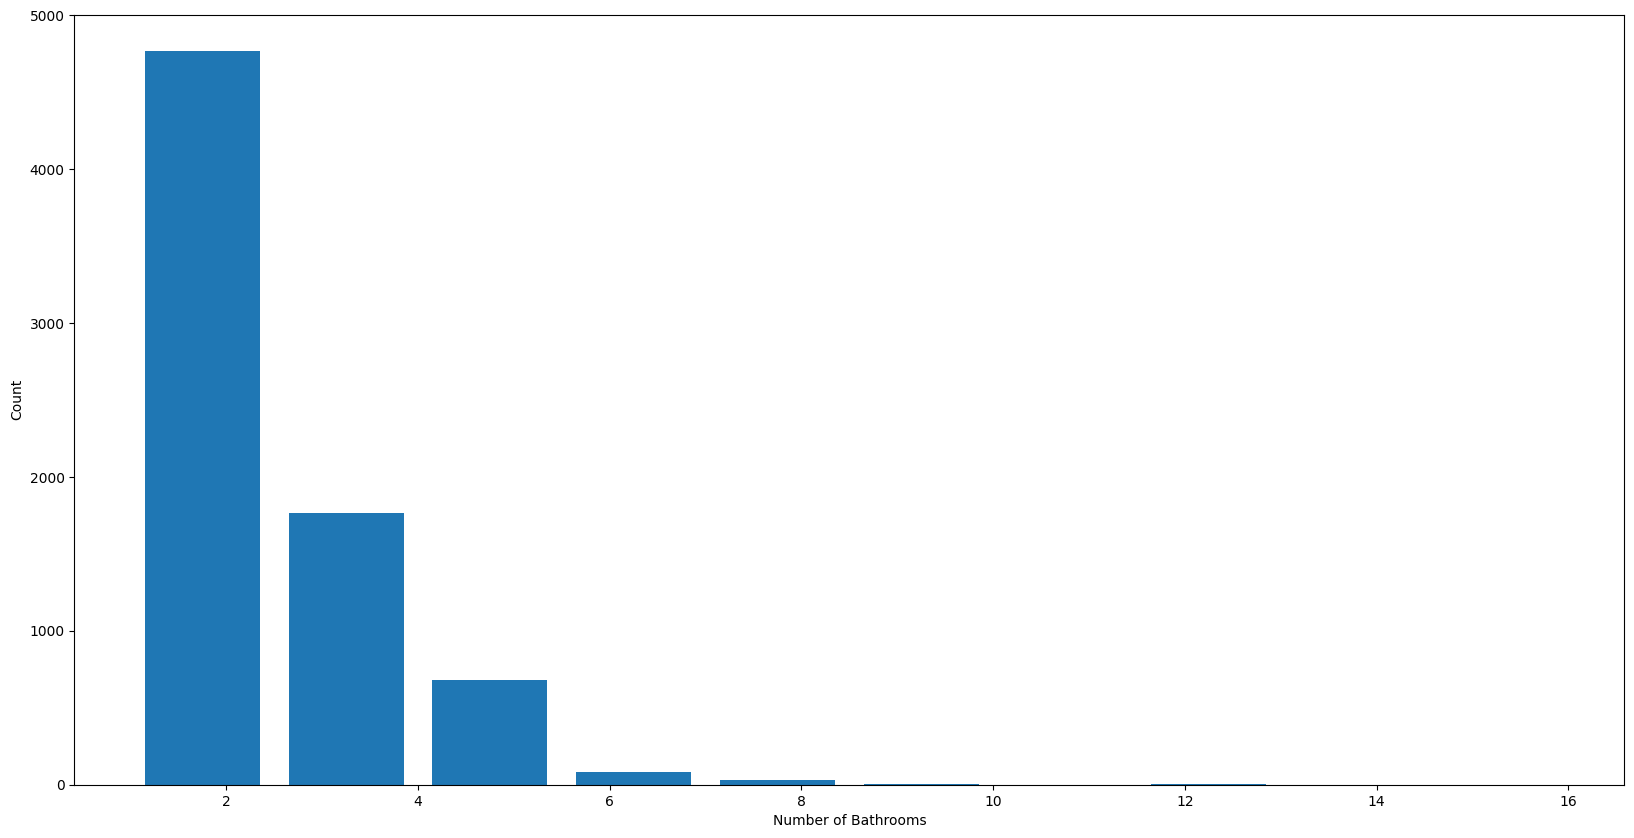

In [42]:
plt.hist(re8.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [61]:
re8[re8.bath>re8.bhk+2]

location       size  total_sqft  bath   price  bhk  Price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8411          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [62]:
re9=re8[re8.bath<re8.bhk+2]
re9.shape

(7251, 7)

In [63]:
re10=re9.drop(['size','Price_per_sqft'],axis='columns')
re10.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

In [64]:
dummies = pd.get_dummies(re10.location)
dummies.head(3)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                 True               False                      False   
1                 True               False                      False   
2                 True               False                      False   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0               False               False               False   
1               False               False               False   
2               False               False               False   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0               False  ...                 False               False   
1               False  ...                 False               False   
2               False  ...                 False               False   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0        False       False           False      False               False   
1        False       False           False      False               False   
2        False       False           False      False               False   

   Yelenahalli  Yeshwanthpur  other  
0        False         False  False  
1        False         False  False  
2        False         False  False  

[3 rows x 242 columns]

In [65]:
re11 = pd.concat([re10,dummies.drop('other',axis='columns')],axis='columns')
re11.head(3)

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                 True   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                 True   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                 True   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0               False                      False                 False   
1               False                      False                 False   
2               False                      False                 False   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                 False  ...        False                 False   
1                 False  ...        False                 False   
2                 False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  

[3 rows x 246 columns]

In [66]:
re12=re11.drop('location',axis='columns')
re12.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                 True               False   
1      1630.0   3.0  194.0    3                 True               False   
2      1875.0   2.0  235.0    3                 True               False   
3      1200.0   2.0  130.0    3                 True               False   
4      1235.0   2.0  148.0    2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0               False  ...        False                 False   
1               False  ...        False                 False   
2               False  ...        False                 False   
3               False  ...        False                 False   
4               False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 245 columns]

In [67]:
re12.shape

(7251, 245)

In [68]:
X=re12.drop('price',axis='columns')
X.head()

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                 True               False   
1      1630.0   3.0    3                 True               False   
2      1875.0   2.0    3                 True               False   
3      1200.0   2.0    3                 True               False   
4      1235.0   2.0    2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0               False               False  ...        False   
1               False               False  ...        False   
2               False               False  ...        False   
3               False               False  ...        False   
4               False               False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                 False               False        False       False   
1                 False               False        False       False   
2                 False               False        False       False   
3                 False               False        False       False   
4                 False               False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0           False      False               False        False         False  
1           False      False               False        False         False  
2           False      False               False        False         False  
3           False      False               False        False         False  
4           False      False               False        False         False  

[5 rows x 244 columns]

In [69]:
X.shape

(7251, 244)

In [70]:
y = re12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [71]:
len(y)

7251

In [52]:
pip install -U scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a8/e9/3e4879974a7c4dcaca2a746dde3df08d0ae8f14c74b03591616ce5f0a8b1/scikit_learn-1.4.0-1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/9a/25/5b30cb3efc9566f0ebeaeca1976150316353c17031ad7868ef46de5ab8dc/scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.met


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
# We import train_test_split method from sklearn.model_selection
# train_test_split:-Split arrays or matrices into random train and test subsets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) # here test_size=0.2 means 20% as test samples and remaining 80%
                                                                                       #used for model tray   

In [73]:
# Ordinary least squares Linear Regression.
# LinearRegression fits a linear model with coefficients w = (w1, …, wp) 
# to minimize the residual sum of squares between the observed targets in the dataset,
# and the targets predicted by the linear approximation.
from sklearn.linear_model import LinearRegression
ln_clf=LinearRegression()  # first step to create LinearRegression model
ln_clf.fit(X_train,y_train)  # second step to call fit method .once the X_train,y_train is trained then will go to 3rd step 
ln_clf.score(X_test,y_test) # third step to tell the score which evaluates the how good our model is 

0.8452277697874357

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [78]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# funtion will tell not best model, but also best parameter
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            # 'params': {
            #    'normalize': [True, False]     # Invalid parameter 'normalize' for estimator LinearRegression()
            # }
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # will randomly shuffle the dataset that will give better result
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-pack

model  best_score  \
0  linear_regression    0.819001   
1              lasso    0.687429   
2      decision_tree    0.719898   

                                         best_params  
0  {'copy_X': True, 'fit_intercept': False, 'n_jo...  
1                {'alpha': 1, 'selection': 'cyclic'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

In [79]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [95]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return ln_clf.predict([x])[0]

In [96]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677198772

In [100]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.72616900774717

In [98]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006513

In [99]:
predict_price('Indira Nagar',1000, 3,3)

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033236

## Export the tested model to a pickle file

In [101]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(ln_clf,f)

## Export location and column information to a file that will be useful later on in our prediction application

In [102]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))